# Geomorfometría aplicada al análisis del paisaje

In [ ]:
# instalar la librería tifffile: pip install tifffile
# importar las librerías que se usarán
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff

# abro el DEM
img_path="DEM.tif"
img = tiff.imread(img_path)

# chequeo que abra bien la imagen
print('img type: ',type(img))#con tiff
print('img len: ',len(img))#con tiff
print('img shape: ',img.shape)
print('img max: ',img.max())
print('img min: ',img.min())

In [2]:
# Calculo los TPI

# Utilizo filter2D para calcular la media (dst1 y dst2) y restar al valor de Z (img)
def mascara(x):
    return(np.ones((x,x),np.float32)/(x*x))
n=int(input("Ingrese tamaño máscara TPI mínimo (n positivo)):")) #probar con 51
kernel1=mascara(n)
m=int(input("Ingrese tamaño máscara TPI máximo (n positivo)):")) #probar con 201
kernel2=mascara(m)

dst1= cv2.filter2D(img,-1,kernel1)
dst2= cv2.filter2D(img,-1,kernel2)

TPI2= img-dst2
TPI1= img-dst1

# chequeo los valores para ver si están bien
print('dst1')
print(dst1)
print('dst2')
print(dst2)
print('dst1 type: ',type(dst2))
print('dst1 len: ',len(dst2))
print('dst1 shape: ',dst1.shape)
print('dst1 max: ', dst1.max())
print('dst1 min: ', dst1.min())
print('dst2 type: ',type(dst2))
print('dst2 len: ',len(dst2))
print('dst2 shape: ',dst2.shape)
print('dst2 max: ',dst2.max())
print('dst2 min: ',dst2.min())
print('TPI1 shape: ',TPI1.shape)
print('TPI1 max: ',TPI1.max())
print('TPI1 min: ',TPI1.min())
print('TPI2 shape: ',TPI2.shape)
print('TPI2 max: ',TPI2.max())
print('TPI2 min: ',TPI2.min())

Ingrese tamaño máscara TPI mínimo (n positivo)):51
Ingrese tamaño máscara TPI máximo (n positivo)):201
dst1
[[756 756 756 ... 701 701 701]
 [756 756 756 ... 701 701 701]
 [756 756 756 ... 701 701 701]
 ...
 [756 756 756 ... 747 747 747]
 [756 756 756 ... 747 747 747]
 [756 756 756 ... 747 747 747]]
dst2
[[749 749 749 ... 704 704 704]
 [749 749 749 ... 704 704 704]
 [749 749 749 ... 704 704 704]
 ...
 [754 754 754 ... 743 743 743]
 [754 754 754 ... 743 743 743]
 [754 754 754 ... 743 743 743]]
dst1 type:  <class 'numpy.ndarray'>
dst1 len:  340
dst1 shape:  (340, 336)
dst1 max:  771
dst1 min:  693
dst2 type:  <class 'numpy.ndarray'>
dst2 len:  340
dst2 shape:  (340, 336)
dst2 max:  754
dst2 min:  704
TPI1 shape:  (340, 336)
TPI1 max:  17
TPI1 min:  -14
TPI2 shape:  (340, 336)
TPI2 max:  31
TPI2 min:  -26


In [3]:
# Normalizo el TPI según la media y la STDV

# Calculo la media y STDV de toda la imágen
TPI1array = np.array(TPI1)
TPI2array = np.array(TPI2)

# media de TPI
media1=TPI1array.mean()
media2=TPI2array.mean()
print(media1)
print(media2)

# desviación estándar
std1=TPI1array.std()
std2=TPI2array.std()
print(std1)
print(std2)

# normalización del TPI
# Weiss 2001 - Topographic Position and Landforms Analysis
# nomralized TPI GRID tpi<sf>_stdi = int((((tpi<sf> – mean) / stdv) * 100) + 0.5)
TPI1= ((((TPI1 - media1) / std1) * 100) + 0.5);
TPI2= ((((TPI2 - media2) / std2) * 100) + 0.5);

# chequeo los valores para ver si están bien
print('TPI1')
print(TPI1)
print('TPI2')
print(TPI2)
print('TPI1 shape: ',TPI1.shape)
print('TPI1 max: ',TPI1.max())
print('TPI1 min: ',TPI1.min())
print('TPI2 shape: ',TPI2.shape)
print('TPI2 max: ',TPI2.max())
print('TPI2 min: ',TPI2.min())

0.003834033613445378
0.00814950980392157
3.9688655260025594
10.751243907580177
TPI1
[[-150.77330453 -150.77330453 -175.96942149 ...   25.5995142
    25.5995142     0.40339724]
 [-150.77330453 -150.77330453 -150.77330453 ...   25.5995142
     0.40339724    0.40339724]
 [-150.77330453 -150.77330453 -150.77330453 ...    0.40339724
     0.40339724  -24.79271972]
 ...
 [ -24.79271972  -24.79271972  -24.79271972 ...   50.79563116
    50.79563116   25.5995142 ]
 [   0.40339724    0.40339724  -24.79271972 ...   50.79563116
    25.5995142    25.5995142 ]
 [  25.5995142    25.5995142     0.40339724 ...   50.79563116
    50.79563116   25.5995142 ]]
TPI2
[[  9.72544869   9.72544869   0.42419938 ... -18.17829925 -18.17829925
  -27.47954856]
 [  9.72544869   9.72544869   9.72544869 ... -18.17829925 -27.47954856
  -27.47954856]
 [  9.72544869   9.72544869   9.72544869 ... -27.47954856 -27.47954856
  -36.78079787]
 ...
 [  9.72544869   9.72544869   9.72544869 ...  56.23169525  56.23169525
   46.930445

In [13]:
# Calculo la pendiente:
# http://desktop.arcgis.com/es/arcmap/10.3/tools/spatial-analyst-toolbox/how-slope-works.htm
# slope_degrees = ATAN ( √ ([dz/dx]2 + [dz/dy]2) ) * 57.29578 (ArcGIS)
# Nota: El valor 57,29578 que se muestra aquí es una versión truncada del resultado de 180/pi.

#slp = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3) #1 0 indica sentido x, ksize: tamaño kernel

# convierto la imagen a float32 para que corra la función cv2.Sobel
# las funciones soportan los tipos de datos CV_8U, CV_16U, CV_16S, CV_32F and CV_64F
img32 = np.float32(img) 
sobelx = cv2.Sobel(img32,-1,1,0,3)
sobely = cv2.Sobel(img32,-1,0,1,3)

# sqrt= x**(.5)
slp=(np.arctan((sobelx**(2)+sobely**(2))**(.5)))*57.29578


# chequeo los valores para ver si están bien
print('slope')
print(slp)
print('slope shape: ',slp.shape)
print('slope max: ',slp.max())
print('slope min: ',slp.min())

slope
[[ 0.       63.43495  63.43495  ... 75.96376  75.96376   0.      ]
 [ 0.       54.73561  72.4516   ... 79.97501  79.97501  75.96376 ]
 [75.96376  72.4516   54.73561  ... 82.10486  82.10486  80.53768 ]
 ...
 [80.53768  81.01512  78.9042   ... 63.43495  75.96376   0.      ]
 [82.874985 82.51949  80.268524 ... 63.43495  75.96376   0.      ]
 [ 0.       75.96376  75.96376  ... 63.43495  75.96376   0.      ]]
slope shape:  (340, 336)
slope max:  88.70933
slope min:  0.0


In [5]:
# Clasifico las formas según los valores de TPI y la pendiente
l=TPI1.shape
landform=np.ones((l[0],l[1]),np.float32) #inicio la matriz landform

for i in range(l[0]):
    for j in range(l[1]):
        if TPI1[i][j] > -100 and TPI1[i][j] < 100 and TPI2[i][j] > -100 and TPI2[i][j] < 100 and slp[i][j] <= 5:
            landform[i][j] = 5
        elif TPI1[i][j] > -100 and TPI1[i][j] < 100 and TPI2[i][j] > -100 and TPI2[i][j] < 100 and slp[i][j] >= 5:
            landform[i][j] = 6
        elif TPI1[i][j] > -100 and TPI1[i][j] < 100 and TPI2[i][j] >= 100:
            landform[i][j] = 7
        elif TPI1[i][j] > -100 and TPI1[i][j] < 100 and TPI2[i][j] <= -100:
            landform[i][j] = 4
        elif TPI1[i][j] <= -100 and TPI2[i][j] > -100 and TPI2[i][j] < 100:
            landform[i][j] = 2
        elif TPI1[i][j] >= 100 and TPI2[i][j] > -100 and TPI2[i][j] < 100:
            landform[i][j] = 9
        elif TPI1[i][j] <= -100 and TPI2[i][j] >= 100:
            landform[i][j] = 3
        elif TPI1[i][j] <= -100 and TPI2[i][j] <= -100:
            landform[i][j] = 1
        elif TPI1[i][j] >= 100 and TPI2[i][j] >= 100:
            landform[i][j] = 10
        elif TPI1[i][j] >= 100 and TPI2[i][j] <= -100:
            landform[i][j] = 8

# 1.Streams
# 2.Lateral midslope incised drainages, Local valleys in plains
# 3.Upland incised drainages, Stream headwaters
# 4.U-Shape valleys
# 5.Plains, Broad flat areas
# 6.Broad open slopes
# 7.Upper rlopes, Flat ridges tops, Mesa tops
# 8.Local ridges, Hilltops within broad valleys
# 9.Midslope ridges drainage divides
# 10.High narrow ridges, Mountain tops

# chequeo los valores para ver si están bien
print('landform')
print(landform)
print('landform shape: ',landform.shape)
print('landform max: ',landform.max())
print('landform min: ',landform.min())


landform
[[2. 2. 2. ... 6. 6. 5.]
 [2. 2. 2. ... 6. 6. 6.]
 [2. 2. 2. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 5.]
 [6. 6. 6. ... 6. 6. 5.]
 [5. 6. 6. ... 6. 6. 5.]]
landform shape:  (340, 336)
landform max:  10.0
landform min:  1.0


In [9]:
# Aplico un filtro de suavizado para mejorar los resultados.
def mascara(x):
    return(np.ones((x,x),np.float32)/(x*x))
s=int(input("Ingrese tamaño mascara de suavizado (n positivo)):")) #probar con 6 o 11
kernel1=mascara(s)

landform1= cv2.filter2D(landform,-1,kernel1)

# redondeo
l=landform1.shape
for i in range(l[0]):
    for j in range(l[1]):
        landform1[i][j] = round(landform1[i][j])

# chequeo los valores para ver si están bien
print('landform1')
print(landform1)
print('landform1 shape: ',landform1.shape)
print('landform1 max: ',landform1.max())
print('landform1 min: ',landform1.min())

Ingrese tamaño mascara de suavizado (n positivo)):6
landform1
[[2. 2. 2. ... 6. 6. 6.]
 [2. 2. 2. ... 6. 6. 6.]
 [2. 2. 2. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]
landform1 shape:  (340, 336)
landform1 max:  10.0
landform1 min:  1.0


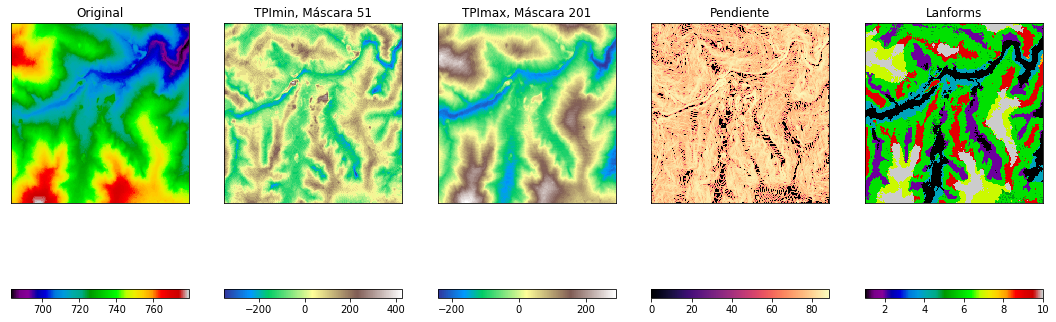

In [10]:
# Grafico DEM, TPI, Slope, Landform
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(151),plt.imshow(img,cmap='nipy_spectral'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(152),plt.imshow(TPI1,cmap='terrain'),plt.title('TPImin, Máscara %d' %(n))
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(153),plt.imshow(TPI2,cmap='terrain'),plt.title('TPImax, Máscara %d' %(m))
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(154),plt.imshow(slp,cmap='magma'),plt.title('Pendiente')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(155),plt.imshow(landform,cmap='nipy_spectral',vmin=1,vmax=10),plt.title('Lanforms')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.show()

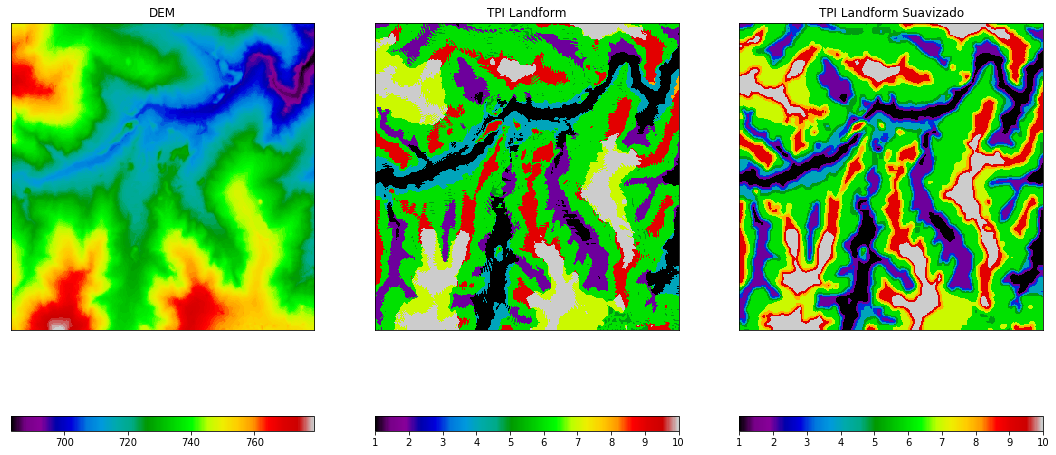

References:
1.Streams
2.Lateral midslope incised drainages, Local valleys in plains
3.Upland incised drainages, Stream headwaters
4.U-Shape valleys
5.Plains, Broad flat areas
6.Broad open slopes
7.Upper slopes, Flat ridges tops, Mesa tops
8.Local ridges, Hilltops within broad valleys
9.Midslope ridges drainage divides
10.High narrow ridges, Mountain tops


In [11]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(131),plt.imshow(img,cmap='nipy_spectral'),plt.title('DEM')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(132),plt.imshow(landform,cmap='nipy_spectral',vmin=1,vmax=10),plt.title('TPI Landform')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.subplot(133),plt.imshow(landform1,cmap='nipy_spectral',vmin=1,vmax=10),plt.title('TPI Landform Suavizado')
plt.xticks([]), plt.yticks([])
plt.colorbar(orientation='horizontal')
plt.show()

print('References:')
print('1.Streams')
print('2.Lateral midslope incised drainages, Local valleys in plains')
print('3.Upland incised drainages, Stream headwaters') 
print('4.U-Shape valleys')
print('5.Plains, Broad flat areas')
print('6.Broad open slopes')
print('7.Upper slopes, Flat ridges tops, Mesa tops')
print('8.Local ridges, Hilltops within broad valleys')
print('9.Midslope ridges drainage divides')
print('10.High narrow ridges, Mountain tops')